In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = '/content/Live.csv'  # replace with the actual path to your CSV file
data = pd.read_csv(file_path)

# Define features and target
X = data[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
y = data['status_type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifiers
knn = KNeighborsClassifier(n_neighbors=80)
logistic_model = LogisticRegression(max_iter=200)
mlp = MLPClassifier(max_iter=200, random_state=1)

# Train the models
knn.fit(X_train_scaled, y_train)
logistic_model.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_mlp = mlp.predict(X_test_scaled)

def actual_vs_predicted(model_name):
    print(f"Actual vs Predicted for {model_name}:")
    if model_name == 'KNN':
        comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
    elif model_name == 'Logistic Regression':
        comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_logistic})
    elif model_name == 'MLP':
        comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mlp})
    print(comparison.head(10))

def classification_report_display(model_name):
    print(f"Classification Report for {model_name}:")
    if model_name == 'KNN':
        print(classification_report(y_test, y_pred_knn))
    elif model_name == 'Logistic Regression':
        print(classification_report(y_test, y_pred_logistic))
    elif model_name == 'MLP':
        print(classification_report(y_test, y_pred_mlp))

def accuracy_display(model_name):
    if model_name == 'KNN':
        accuracy = accuracy_score(y_test, y_pred_knn)
    elif model_name == 'Logistic Regression':
        accuracy = accuracy_score(y_test, y_pred_logistic)
    elif model_name == 'MLP':
        accuracy = accuracy_score(y_test, y_pred_mlp)
    print(f'Accuracy for {model_name}: {accuracy:.2f}')

def classify_input(model_name):
    num_comments = float(input("Enter number of comments: "))
    num_shares = float(input("Enter number of shares: "))
    num_likes = float(input("Enter number of likes: "))
    num_loves = float(input("Enter number of loves: "))
    num_wows = float(input("Enter number of wows: "))
    num_hahas = float(input("Enter number of hahas: "))
    num_sads = float(input("Enter number of sads: "))
    num_angrys = float(input("Enter number of angrys: "))

    # Scale the input data
    input_data = scaler.transform([[num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys]])

    # Predict the target status_type
    if model_name == 'KNN':
        predicted_status_type = knn.predict(input_data)
    elif model_name == 'Logistic Regression':
        predicted_status_type = logistic_model.predict(input_data)
    elif model_name == 'MLP':
        predicted_status_type = mlp.predict(input_data)
    print(f"Predicted status type by {model_name}: {predicted_status_type[0]}")

def menu():
    while True:
        print("\nMenu:")
        print("======================================")
        print("------ KNN --------")
        print("1.1 Actual vs Predicted")
        print("1.2 Classification Report")
        print("1.3 Accuracy")
        print("1.4 Try User Input")
        print("======================================")
        print("----- Logistic ------ ")
        print("2.1 Actual vs Predicted")
        print("2.2 Classification Report")
        print("2.3 Accuracy")
        print("2.4 Try User Input")
        print("======================================")
        print("------- MLP - ------ ")
        print("3.1 Actual vs Predicted")
        print("3.2 Classification Report")
        print("3.3 Accuracy")
        print("3.4 Try User Input")
        print("======================================")
        print("4. Again Menu")
        print("5. Exit")
        print("======================================")

        choice = input("Enter your choice: ")

        if choice == '1.1':
            actual_vs_predicted('KNN')
        elif choice == '1.2':
            classification_report_display('KNN')
        elif choice == '1.3':
            accuracy_display('KNN')
        elif choice == '1.4':
            classify_input('KNN')
        elif choice == '2.1':
            actual_vs_predicted('Logistic Regression')
        elif choice == '2.2':
            classification_report_display('Logistic Regression')
        elif choice == '2.3':
            accuracy_display('Logistic Regression')
        elif choice == '2.4':
            classify_input('Logistic Regression')
        elif choice == '3.1':
            actual_vs_predicted('MLP')
        elif choice == '3.2':
            classification_report_display('MLP')
        elif choice == '3.3':
            accuracy_display('MLP')
        elif choice == '3.4':
            classify_input('MLP')
        elif choice == '4':
            continue
        elif choice == '5':
            break
        else:
            print("Invalid choice. Please try again.")

# Call the menu function to display the menu
menu()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Menu:
------ KNN --------
1.1 Actual vs Predicted
1.2 Classification Report
1.3 Accuracy
1.4 Try User Input
----- Logistic ------ 
2.1 Actual vs Predicted
2.2 Classification Report
2.3 Accuracy
2.4 Try User Input
------- MLP - ------ 
3.1 Actual vs Predicted
3.2 Classification Report
3.3 Accuracy
3.4 Try User Input
4. Again Menu
5. Exit


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for KNN:
              precision    recall  f1-score   support

        link       0.00      0.00      0.00        15
       photo       0.77      0.91      0.83      1212
      status       0.00      0.00      0.00        98
       video       0.83      0.72      0.77       813

    accuracy                           0.79      2138
   macro avg       0.40      0.41      0.40      2138
weighted avg       0.75      0.79      0.77      2138


Menu:
------ KNN --------
1.1 Actual vs Predicted
1.2 Classification Report
1.3 Accuracy
1.4 Try User Input
----- Logistic ------ 
2.1 Actual vs Predicted
2.2 Classification Report
2.3 Accuracy
2.4 Try User Input
------- MLP - ------ 
3.1 Actual vs Predicted
3.2 Classification Report
3.3 Accuracy
3.4 Try User Input
4. Again Menu
5. Exit
Actual vs Predicted for Logistic Regression:
     Actual Predicted
6717  photo     photo
823   video     photo
3504  photo     photo
1749  photo     photo
513   video     photo
6137  video     v

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Menu:
------ KNN --------
1.1 Actual vs Predicted
1.2 Classification Report
1.3 Accuracy
1.4 Try User Input
----- Logistic ------ 
2.1 Actual vs Predicted
2.2 Classification Report
2.3 Accuracy
2.4 Try User Input
------- MLP - ------ 
3.1 Actual vs Predicted
3.2 Classification Report
3.3 Accuracy
3.4 Try User Input
4. Visualize Features
5. Again Menu
6. Exit


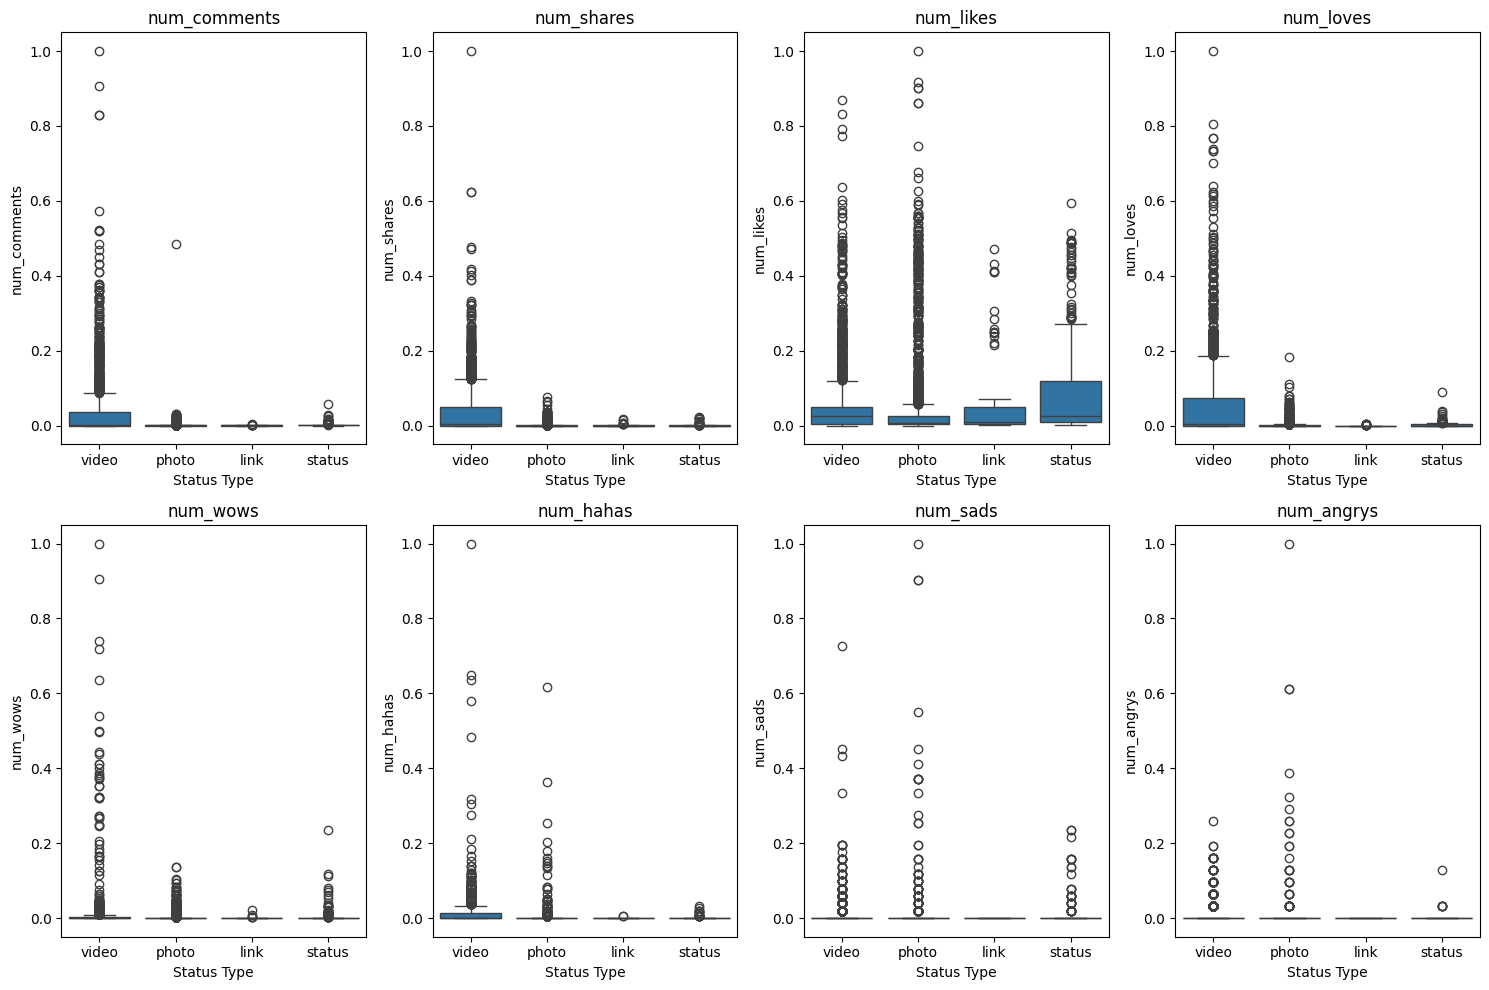


Menu:
------ KNN --------
1.1 Actual vs Predicted
1.2 Classification Report
1.3 Accuracy
1.4 Try User Input
----- Logistic ------ 
2.1 Actual vs Predicted
2.2 Classification Report
2.3 Accuracy
2.4 Try User Input
------- MLP - ------ 
3.1 Actual vs Predicted
3.2 Classification Report
3.3 Accuracy
3.4 Try User Input
4. Visualize Features
5. Again Menu
6. Exit


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Live.csv'
data = pd.read_csv(file_path)

# Define features and target
X = data[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
y = data['status_type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifiers
knn = KNeighborsClassifier(n_neighbors=80)
logistic_model = LogisticRegression(max_iter=200)
mlp = MLPClassifier(max_iter=200, random_state=1)

# Train the models
knn.fit(X_train_scaled, y_train)
logistic_model.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_mlp = mlp.predict(X_test_scaled)

def actual_vs_predicted(model_name):
    print(f"Actual vs Predicted for {model_name}:")
    if model_name == 'KNN':
        comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
    elif model_name == 'Logistic Regression':
        comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_logistic})
    elif model_name == 'MLP':
        comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mlp})
    print(comparison.head(10))

def classification_report_display(model_name):
    print(f"Classification Report for {model_name}:")
    if model_name == 'KNN':
        print(classification_report(y_test, y_pred_knn))
    elif model_name == 'Logistic Regression':
        print(classification_report(y_test, y_pred_logistic))
    elif model_name == 'MLP':
        print(classification_report(y_test, y_pred_mlp))

def accuracy_display(model_name):
    if model_name == 'KNN':
        accuracy = accuracy_score(y_test, y_pred_knn)
    elif model_name == 'Logistic Regression':
        accuracy = accuracy_score(y_test, y_pred_logistic)
    elif model_name == 'MLP':
        accuracy = accuracy_score(y_test, y_pred_mlp)
    print(f'Accuracy for {model_name}: {accuracy:.2f}')

def classify_input(model_name):
    num_comments = float(input("Enter number of comments: "))
    num_shares = float(input("Enter number of shares: "))
    num_likes = float(input("Enter number of likes: "))
    num_loves = float(input("Enter number of loves: "))
    num_wows = float(input("Enter number of wows: "))
    num_hahas = float(input("Enter number of hahas: "))
    num_sads = float(input("Enter number of sads: "))
    num_angrys = float(input("Enter number of angrys: "))

    # Scale the input data
    input_data = scaler.transform([[num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys]])

    # Predict the target status_type
    if model_name == 'KNN':
        predicted_status_type = knn.predict(input_data)
    elif model_name == 'Logistic Regression':
        predicted_status_type = logistic_model.predict(input_data)
    elif model_name == 'MLP':
        predicted_status_type = mlp.predict(input_data)
    print(f"Predicted status type by {model_name}: {predicted_status_type[0]}")

def visualize_features():
    features = ['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):
        plt.subplot(2, 4, i + 1)
        sns.boxplot(x=y, y=data[feature])
        plt.title(feature)
        plt.xlabel('Status Type')
        plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

def menu():
    while True:
        print("\nMenu:")
        print("======================================")
        print("------ KNN --------")
        print("1.1 Actual vs Predicted")
        print("1.2 Classification Report")
        print("1.3 Accuracy")
        print("1.4 Try User Input")
        print("======================================")
        print("----- Logistic ------ ")
        print("2.1 Actual vs Predicted")
        print("2.2 Classification Report")
        print("2.3 Accuracy")
        print("2.4 Try User Input")
        print("======================================")
        print("------- MLP - ------ ")
        print("3.1 Actual vs Predicted")
        print("3.2 Classification Report")
        print("3.3 Accuracy")
        print("3.4 Try User Input")
        print("======================================")
        print("4. Visualize Features")
        print("5. Again Menu")
        print("6. Exit")
        print("======================================")

        choice = input("Enter your choice: ")

        if choice == '1.1':
            actual_vs_predicted('KNN')
        elif choice == '1.2':
            classification_report_display('KNN')
        elif choice == '1.3':
            accuracy_display('KNN')
        elif choice == '1.4':
            classify_input('KNN')
        elif choice == '2.1':
            actual_vs_predicted('Logistic Regression')
        elif choice == '2.2':
            classification_report_display('Logistic Regression')
        elif choice == '2.3':
            accuracy_display('Logistic Regression')
        elif choice == '2.4':
            classify_input('Logistic Regression')
        elif choice == '3.1':
            actual_vs_predicted('MLP')
        elif choice == '3.2':
            classification_report_display('MLP')
        elif choice == '3.3':
            accuracy_display('MLP')
        elif choice == '3.4':
            classify_input('MLP')
        elif choice == '4':
            visualize_features()
        elif choice == '5':
            continue
        elif choice == '6':
            break
        else:
            print("Invalid choice. Please try again.")

# Call the menu function to display the menu
menu()


In [ ]:
#**********************************    PROJECT      ****************
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/Live.csv'
data = pd.read_csv(file_path)

In [ ]:
data.shape

(7126, 10)

In [ ]:
data.columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'status_type'],
      dtype='object')

In [ ]:
data.isnull().values.any()

False

In [ ]:
X = data[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
y = data['status_type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
scaler = StandardScaler()  #features are on similar scales
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)  #consider the 50 nearest neighbors when making predictions.
logistic_model = LogisticRegression(max_iter=200)  #200 iterations to find the optimal solution.
mlp = MLPClassifier(max_iter=200, random_state=50)  #same sequence of random numbers is generated each time the code is run, weught

In [ ]:
knn.fit(X_train_scaled, y_train)
logistic_model.fit(X_train_scaled, y_train)  #train each classifier on the training data.
mlp.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=50)

In [ ]:
y_pred_knn = knn.predict(X_test_scaled)
y_pred_logistic = logistic_model.predict(X_test_scaled)  # pred from each classifier
y_pred_mlp = mlp.predict(X_test_scaled)

In [ ]:
def actual_vs_predicted(model_name):
    print(f"Actual vs Predicted for {model_name}:")
    if model_name == 'KNN':
        comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
    elif model_name == 'Logistic Regression':
        comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_logistic})
    elif model_name == 'MLP':
        comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mlp})
    print(comparison.head(10))  #  print the first 10 rows of your DataFrame

In [ ]:
def classification_report_display(model_name):
    print(f"Classification Report for {model_name}:")
    if model_name == 'KNN':
        print(classification_report(y_test, y_pred_knn))
    elif model_name == 'Logistic Regression':
        print(classification_report(y_test, y_pred_logistic))
    elif model_name == 'MLP':
        print(classification_report(y_test, y_pred_mlp))

In [ ]:
def accuracy_display(model_name):
    if model_name == 'KNN':
        accuracy = accuracy_score(y_test, y_pred_knn)
    elif model_name == 'Logistic Regression':
        accuracy = accuracy_score(y_test, y_pred_logistic)
    elif model_name == 'MLP':
        accuracy = accuracy_score(y_test, y_pred_mlp)
    print(f'Accuracy for {model_name}: {accuracy:.2f}')

In [ ]:
def confusion_matrix_display(model_name):
    print(f"Confusion Matrix for {model_name}:")
    if model_name == 'KNN':
        cm = confusion_matrix(y_test, y_pred_knn)
    elif model_name == 'Logistic Regression':
        cm = confusion_matrix(y_test, y_pred_logistic)
    elif model_name == 'MLP':
        cm = confusion_matrix(y_test, y_pred_mlp)
    print(cm)

In [ ]:
def classify_input(model_name):
    num_comments = float(input("Enter number of comments: "))
    num_shares = float(input("Enter number of shares: "))
    num_likes = float(input("Enter number of likes: "))
    num_loves = float(input("Enter number of loves: "))
    num_wows = float(input("Enter number of wows: "))
    num_hahas = float(input("Enter number of hahas: "))
    num_sads = float(input("Enter number of sads: "))
    num_angrys = float(input("Enter number of angrys: "))

    input_data = scaler.transform([[num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys]]) #applies the scaling transformation to the input data, all features are on a similar scale

    if model_name == 'KNN':
        predicted_status_type = knn.predict(input_data)
    elif model_name == 'Logistic Regression':
        predicted_status_type = logistic_model.predict(input_data)
    elif model_name == 'MLP':
        predicted_status_type = mlp.predict(input_data)
    print(f"Predicted status type by {model_name}: {predicted_status_type[0]}")

In [ ]:
def visualize_features():

    status_counts = data['status_type'].value_counts()

    plt.figure(figsize=(5, 3))
    status_counts.plot(kind='bar', color='red')
    plt.title('Occurrences of Each Status Type')
    plt.xlabel('Status Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print("\n")

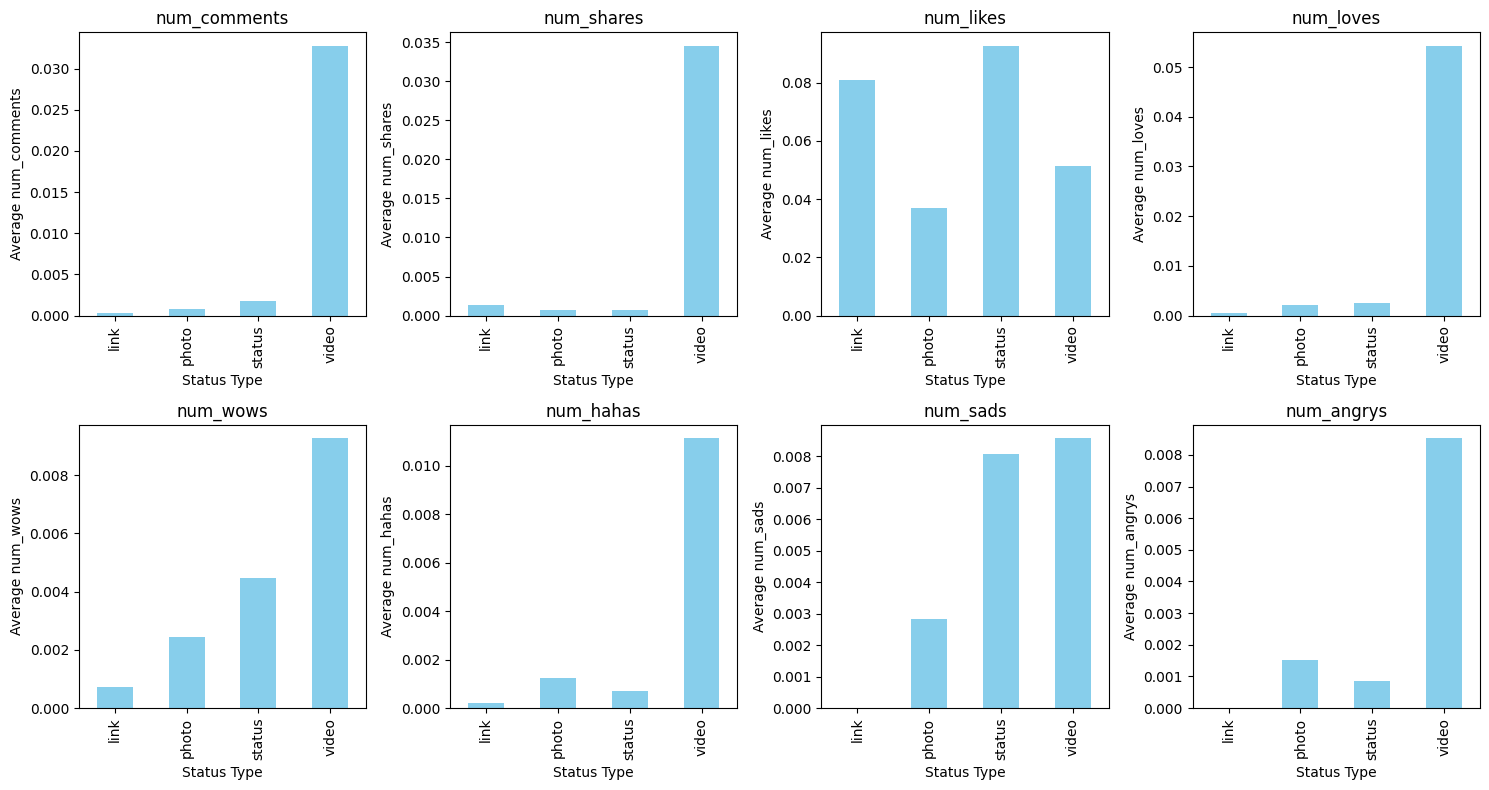

In [ ]:
    features = ['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
    plt.figure(figsize=(15, 8))
    for i, feature in enumerate(features):
        plt.subplot(2, 4, i + 1)
        data.groupby('status_type')[feature].mean().plot(kind='bar', color='skyblue')
        plt.title(feature)
        plt.xlabel('Status Type')
        plt.ylabel('Average ' + feature)
    plt.tight_layout()
    plt.show()

In [ ]:
def menu():
    while True:
        print("\nMenu:")
        print("======================================")
        print("-------------- KNN -----------------")
        print("======================================")
        print("1.1 Actual vs Predicted")
        print("1.2 Classification Report")
        print("1.3 Accuracy")
        print("1.4 Confusion Matrix")
        print("1.5 Try User Input")
        print("======================================")
        print("-------------- Logistic ------------ ")
        print("======================================")
        print("2.1 Actual vs Predicted")
        print("2.2 Classification Report")
        print("2.3 Accuracy")
        print("2.4 Confusion Matrix")
        print("2.5 Try User Input")
        print("======================================")
        print("--------------- MLP ---------------- ")
        print("======================================")
        print("3.1 Actual vs Predicted")
        print("3.2 Classification Report")
        print("3.3 Accuracy")
        print("3.4 Confusion Matrix")
        print("3.5 Try User Input")
        print("======================================")
        print("4. Visualize Features")
        print("5. Menu")
        print("6. Exit")
        print("======================================")

        choice = input("Enter your choice: ")

        if choice == '1.1':
            actual_vs_predicted('KNN')
        elif choice == '1.2':
            classification_report_display('KNN')
        elif choice == '1.3':
            accuracy_display('KNN')
        elif choice == '1.4':
            confusion_matrix_display('KNN')
        elif choice == '1.5':
            classify_input('KNN')
        elif choice == '2.1':
            actual_vs_predicted('Logistic Regression')
        elif choice == '2.2':
            classification_report_display('Logistic Regression')
        elif choice == '2.3':
            accuracy_display('Logistic Regression')
        elif choice == '2.4':
            confusion_matrix_display('Logistic Regression')
        elif choice == '2.5':
            classify_input('Logistic Regression')
        elif choice == '3.1':
            actual_vs_predicted('MLP')
        elif choice == '3.2':
            classification_report_display('MLP')
        elif choice == '3.3':
            accuracy_display('MLP')
        elif choice == '3.4':
            confusion_matrix_display('MLP')
        elif choice == '3.5':
            classify_input('MLP')
        elif choice == '4':
            visualize_features()
        elif choice == '5':
            continue
        elif choice == '6':
            break
        else:
            print("Invalid choice. Please try again.")

menu()


Menu:
-------------- KNN -----------------
1.1 Actual vs Predicted
1.2 Classification Report
1.3 Accuracy
1.4 Confusion Matrix
1.5 Try User Input
-------------- Logistic ------------ 
2.1 Actual vs Predicted
2.2 Classification Report
2.3 Accuracy
2.4 Confusion Matrix
2.5 Try User Input
--------------- MLP ---------------- 
3.1 Actual vs Predicted
3.2 Classification Report
3.3 Accuracy
3.4 Confusion Matrix
3.5 Try User Input
4. Visualize Features
5. Menu
6. Exit
Enter your choice: 1.1
Actual vs Predicted for KNN:
     Actual Predicted
6717  photo     photo
823   video     photo
3504  photo     photo
1749  photo     photo
513   video     photo
6137  video     video
4893  video     video
3756  video     video
2411  photo     photo
234   video     photo

Menu:
-------------- KNN -----------------
1.1 Actual vs Predicted
1.2 Classification Report
1.3 Accuracy
1.4 Confusion Matrix
1.5 Try User Input
-------------- Logistic ------------ 
2.1 Actual vs Predicted
2.2 Classification Report
2.3 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for KNN:
              precision    recall  f1-score   support

        link       0.00      0.00      0.00        12
       photo       0.78      0.90      0.83       811
      status       0.00      0.00      0.00        66
       video       0.82      0.75      0.78       537

    accuracy                           0.79      1426
   macro avg       0.40      0.41      0.40      1426
weighted avg       0.75      0.79      0.77      1426


Menu:
-------------- KNN -----------------
1.1 Actual vs Predicted
1.2 Classification Report
1.3 Accuracy
1.4 Confusion Matrix
1.5 Try User Input
-------------- Logistic ------------ 
2.1 Actual vs Predicted
2.2 Classification Report
2.3 Accuracy
2.4 Confusion Matrix
2.5 Try User Input
--------------- MLP ---------------- 
3.1 Actual vs Predicted
3.2 Classification Report
3.3 Accuracy
3.4 Confusion Matrix
3.5 Try User Input
4. Visualize Features
5. Menu
6. Exit


KeyboardInterrupt: Interrupted by user

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Menu:
-------------- KNN -----------------
1.1 Actual vs Predicted
1.2 Classification Report
1.3 Accuracy
1.4 Confusion Matrix
1.5 Try User Input
-------------- Logistic ------------ 
2.1 Actual vs Predicted
2.2 Classification Report
2.3 Accuracy
2.4 Confusion Matrix
2.5 Try User Input
--------------- MLP ---------------- 
3.1 Actual vs Predicted
3.2 Classification Report
3.3 Accuracy
3.4 Confusion Matrix
3.5 Try User Input
4. Visualize Features
5. Menu
6. Exit
Enter your choice: 3.1
Actual vs Predicted for MLP:
      Actual Predicted
5351   photo     photo
4995  status    status
5794  status      link
1351   photo     photo
3243   photo     photo
2304   video     photo
4363   video     video
1628   video     photo
6242  status    status
2992   video     video

Menu:
-------------- KNN -----------------
1.1 Actual vs Predicted
1.2 Classification Report
1.3 Accuracy
1.4 Confusion Matrix
1.5 Try User Input
-------------- Logistic ------------ 
2.1 Actual vs Predicted
2.2 Classification 

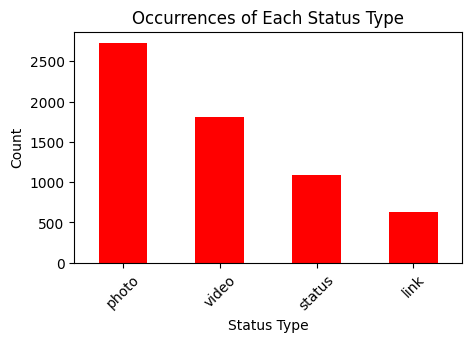

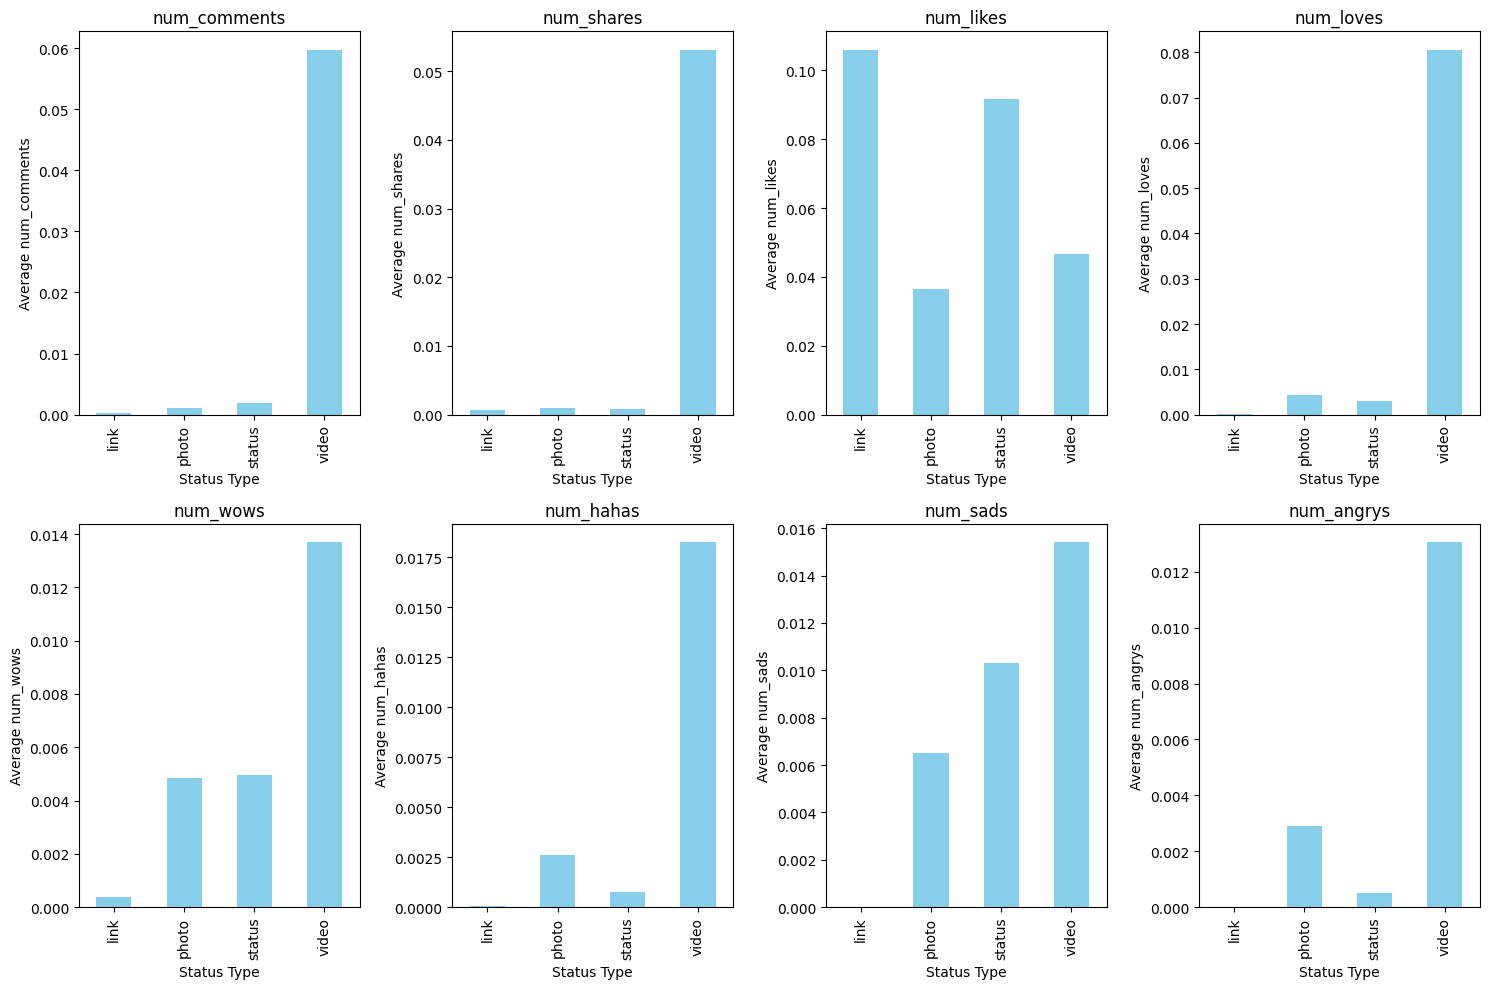


Menu:
-------------- KNN -----------------
1.1 Actual vs Predicted
1.2 Classification Report
1.3 Accuracy
1.4 Confusion Matrix
1.5 Try User Input
-------------- Logistic ------------ 
2.1 Actual vs Predicted
2.2 Classification Report
2.3 Accuracy
2.4 Confusion Matrix
2.5 Try User Input
--------------- MLP ---------------- 
3.1 Actual vs Predicted
3.2 Classification Report
3.3 Accuracy
3.4 Confusion Matrix
3.5 Try User Input
4. Visualize Features
5. Menu
6. Exit
Enter your choice: 6


In [ ]:
#####

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Live (2).csv'
data = pd.read_csv(file_path)

# Define features and target
X = data[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
y = data['status_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=50)  #consider the 50 nearest neighbors when making predictions.
logistic_model = LogisticRegression(max_iter=200)  #200 iterations to find the optimal solution.
mlp = MLPClassifier(max_iter=200, random_state=50)

# Train the models
knn.fit(X_train_scaled, y_train)
logistic_model.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_mlp = mlp.predict(X_test_scaled)

def actual_vs_predicted(model_name):
    print(f"Actual vs Predicted for {model_name}:")
    if model_name == 'KNN':
        comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
    elif model_name == 'Logistic Regression':
        comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_logistic})
    elif model_name == 'MLP':
        comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mlp})
    print(comparison.head(10))

def classification_report_display(model_name):
    print(f"Classification Report for {model_name}:")
    if model_name == 'KNN':
        print(classification_report(y_test, y_pred_knn))
    elif model_name == 'Logistic Regression':
        print(classification_report(y_test, y_pred_logistic))
    elif model_name == 'MLP':
        print(classification_report(y_test, y_pred_mlp))

def accuracy_display(model_name):
    if model_name == 'KNN':
        accuracy = accuracy_score(y_test, y_pred_knn)
    elif model_name == 'Logistic Regression':
        accuracy = accuracy_score(y_test, y_pred_logistic)
    elif model_name == 'MLP':
        accuracy = accuracy_score(y_test, y_pred_mlp)
    print(f'Accuracy for {model_name}: {accuracy:.2f}')

def confusion_matrix_display(model_name):
    print(f"Confusion Matrix for {model_name}:")
    if model_name == 'KNN':
        cm = confusion_matrix(y_test, y_pred_knn)
    elif model_name == 'Logistic Regression':
        cm = confusion_matrix(y_test, y_pred_logistic)
    elif model_name == 'MLP':
        cm = confusion_matrix(y_test, y_pred_mlp)
    print(cm)

def classify_input(model_name):
    num_comments = float(input("Enter number of comments: "))
    num_shares = float(input("Enter number of shares: "))
    num_likes = float(input("Enter number of likes: "))
    num_loves = float(input("Enter number of loves: "))
    num_wows = float(input("Enter number of wows: "))
    num_hahas = float(input("Enter number of hahas: "))
    num_sads = float(input("Enter number of sads: "))
    num_angrys = float(input("Enter number of angrys: "))

    # Scale the input data
    input_data = scaler.transform([[num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys]]) #all features are on a similar scale

    # Predict the target status_type
    if model_name == 'KNN':
        predicted_status_type = knn.predict(input_data)
    elif model_name == 'Logistic Regression':
        predicted_status_type = logistic_model.predict(input_data)
    elif model_name == 'MLP':
        predicted_status_type = mlp.predict(input_data)
    print(f"Predicted status type by {model_name}: {predicted_status_type[0]}")

def visualize_features():

  # Count occurrences of each unique value in 'status_type'
    status_counts = data['status_type'].value_counts()

    # Plot the counts using Matplotlib
    plt.figure(figsize=(5, 3))
    status_counts.plot(kind='bar', color='red')
    plt.title('Occurrences of Each Status Type')
    plt.xlabel('Status Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print("\n")


    features = ['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):
        plt.subplot(2, 4, i + 1)  #library in Python and is used to create subplots
        data.groupby('status_type')[feature].mean().plot(kind='bar', color='skyblue')
        plt.title(feature)
        plt.xlabel('Status Type')
        plt.ylabel('Average ' + feature)
    plt.tight_layout()
    plt.show()



def menu():
    while True:
        print("\nMenu:")
        print("======================================")
        print("-------------- KNN -----------------")
        print("======================================")
        print("1.1 Actual vs Predicted")
        print("1.2 Classification Report")
        print("1.3 Accuracy")
        print("1.4 Confusion Matrix")
        print("1.5 Try User Input")
        print("======================================")
        print("-------------- Logistic ------------ ")
        print("======================================")
        print("2.1 Actual vs Predicted")
        print("2.2 Classification Report")
        print("2.3 Accuracy")
        print("2.4 Confusion Matrix")
        print("2.5 Try User Input")
        print("======================================")
        print("--------------- MLP ---------------- ")
        print("======================================")
        print("3.1 Actual vs Predicted")
        print("3.2 Classification Report")
        print("3.3 Accuracy")
        print("3.4 Confusion Matrix")
        print("3.5 Try User Input")
        print("======================================")
        print("4. Visualize Features")
        print("5. Menu")
        print("6. Exit")
        print("======================================")

        choice = input("Enter your choice: ")

        if choice == '1.1':
            actual_vs_predicted('KNN')
        elif choice == '1.2':
            classification_report_display('KNN')
        elif choice == '1.3':
            accuracy_display('KNN')
        elif choice == '1.4':
            confusion_matrix_display('KNN')
        elif choice == '1.5':
            classify_input('KNN')
        elif choice == '2.1':
            actual_vs_predicted('Logistic Regression')
        elif choice == '2.2':
            classification_report_display('Logistic Regression')
        elif choice == '2.3':
            accuracy_display('Logistic Regression')
        elif choice == '2.4':
            confusion_matrix_display('Logistic Regression')
        elif choice == '2.5':
            classify_input('Logistic Regression')
        elif choice == '3.1':
            actual_vs_predicted('MLP')
        elif choice == '3.2':
            classification_report_display('MLP')
        elif choice == '3.3':
            accuracy_display('MLP')
        elif choice == '3.4':
            confusion_matrix_display('MLP')
        elif choice == '3.5':
            classify_input('MLP')
        elif choice == '4':
            visualize_features()
        elif choice == '5':
            continue
        elif choice == '6':
            break
        else:
            print("Invalid choice. Please try again.")

menu()